# Computer Assignment #0
## Ali Hamzehpour 810100129
### Working with a dataset and make predictions with statistics analysis
We are given a dataset which includes some attributes about each individual and we want to predict if their salary is more than 50K$ or not. At first we should manipulate the dataset and make it better for statistics analysis. Also we are asked to find some individuals with specific attributes in order to have a better understanding of the dataset.<br>
The dataset contains these information for each person:
* age
* workclass
* fnlwgt: This is simply a weight 
* education-num
* marital-status
* occupation
* relationship
* race
* sex
* capital-gain
* capital-loss
* hours-per-week
* native-country
* salary: indicates if salary is more than 50K$ or not and this is what we want to predict
    

In [611]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy

First we load the train dataset which we want to develop our prediction model using it.

In [612]:
import pandas as pd

TRAIN_DATA_SET_DIR = "train.csv"
train_df = pd.read_csv(TRAIN_DATA_SET_DIR)

Now, In order to get a general understanding of our dataset we can call some functions from pandas library.<br>
First we call ```.describe()``` which gives us some useful information for each <i>numeric</i> column of the data frame:
* count -> number of values in that column
* mean 
* std -> standard deviation
* min
* 25%, 50% and 75% percentiles
* max

In [613]:
train_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,29825.000000,2.982500e+04,29825.000000,29825.000000,29825.000000,29825.000000
mean,38.581425,1.897389e+05,10.079229,1094.586052,86.476513,40.434334
std,13.652005,1.053738e+05,2.571678,7485.908646,401.195078,12.308174
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.368790e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can call ```.tail()``` and ```.head()``` functions to get the last 5 and first 5 rows in the data frame:

In [614]:
train_df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
29820,48,Local-gov,127921,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
29821,32,Private,42617,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,30,United-States,<=50K
29822,47,Local-gov,191389,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
29823,38,Private,187983,Prof-school,15,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,<=50K
29824,18,Private,215110,HS-grad,9,Never-married,Handlers-cleaners,Own-child,Black,Male,0,0,40,United-States,<=50K


In [615]:
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The last function we call is ```.info()``` which gives us all columns' names, number of their Non-Null values and their Dtypes. It also gives the memory usage of the data frame

In [616]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29825 non-null  int64 
 1   workclass       28154 non-null  object
 2   fnlwgt          29825 non-null  int64 
 3   education       29825 non-null  object
 4   education-num   29825 non-null  int64 
 5   marital-status  29825 non-null  object
 6   occupation      28149 non-null  object
 7   relationship    29825 non-null  object
 8   race            29825 non-null  object
 9   sex             29825 non-null  object
 10  capital-gain    29825 non-null  int64 
 11  capital-loss    29825 non-null  int64 
 12  hours-per-week  29825 non-null  int64 
 13  native-country  29288 non-null  object
 14  salary          29825 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


One of the problems of our data frame is that some of its columns are non-numeric so in order to work with them we have to convert them into numeric. I used a simple method for that: I gave each unique category a number. I used ```.cat.codes``` but because this method is for ```category``` dtype, I had to convert the column dtype into category first.<br>
I also kept a dictionary which tells us for each category in a column what number is given to that specific category.


In [617]:
cols_categories = {}
for col in train_df.select_dtypes(include = object):
    col_categories = train_df[col].astype("category").cat.categories
    cols_categories[col] = dict(zip(col_categories, range(len(col_categories))))
    train_df[col] = train_df[col].astype("category").dropna().cat.codes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29825 non-null  int64  
 1   workclass       28154 non-null  float64
 2   fnlwgt          29825 non-null  int64  
 3   education       29825 non-null  int8   
 4   education-num   29825 non-null  int64  
 5   marital-status  29825 non-null  int8   
 6   occupation      28149 non-null  float64
 7   relationship    29825 non-null  int8   
 8   race            29825 non-null  int8   
 9   sex             29825 non-null  int8   
 10  capital-gain    29825 non-null  int64  
 11  capital-loss    29825 non-null  int64  
 12  hours-per-week  29825 non-null  int64  
 13  native-country  29288 non-null  float64
 14  salary          29825 non-null  int8   
dtypes: float64(3), int64(6), int8(6)
memory usage: 2.2 MB


I checked one of the rows that contained a NaN value to make sure if NaN values didn't get lost.

In [618]:
train_df.iloc[27]

age                   54.0
workclass              NaN
fnlwgt            180211.0
education             15.0
education-num         10.0
marital-status         2.0
occupation             NaN
relationship           0.0
race                   1.0
sex                    1.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        60.0
native-country        34.0
salary                 1.0
Name: 27, dtype: float64

our data frame has another problem: some parts of the data is missing and we have to fill them with a good method:<br>
* We can replace NaN values with the mean of that column. This method is fast and also easy to implement But there are some disadvantages for this method:
    * It doesn't make sense if we apply it to our non-numeric columns which we turned them to numeric, because it can get non-integer values.
    * Also for our discrete numeric values, It doesn't make sense to use this method.
    * It will change the standard deviation of the data.
    * It ignores the correlation between features. 
* We can use median of the column which doesn't have some of the problems mentioned about mean.
* We can use the mode of the column to fill Nan values. 
* We can drop the rows that include NaN values or drop the column that has too many Nan values.
* We can make a model to predict the missing values using other features.<br><br>
The most logical way is the last one in my idea but I chose mode method because it was faster and easier and also didn't have some of the problems which mean and median method had. I also didn't drop any columns although ```occupation``` and ``work-class`` has many NaN values. The reason is I needed ```work-class``` for other parts of the project and it doesn't make sense to drop ```occupation``` when we want to predict salary!

In [619]:
modes = {}
for col in train_df.columns:
    modes[col] = train_df[col].mode()[0]
    train_df[col] = train_df[col].fillna(modes[col])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29825 non-null  int64  
 1   workclass       29825 non-null  float64
 2   fnlwgt          29825 non-null  int64  
 3   education       29825 non-null  int8   
 4   education-num   29825 non-null  int64  
 5   marital-status  29825 non-null  int8   
 6   occupation      29825 non-null  float64
 7   relationship    29825 non-null  int8   
 8   race            29825 non-null  int8   
 9   sex             29825 non-null  int8   
 10  capital-gain    29825 non-null  int64  
 11  capital-loss    29825 non-null  int64  
 12  hours-per-week  29825 non-null  int64  
 13  native-country  29825 non-null  float64
 14  salary          29825 non-null  int8   
dtypes: float64(3), int64(6), int8(6)
memory usage: 2.2 MB


Again I checked the 27th row to make sure that my job was ok.

In [620]:
train_df.iloc[27]

age                   54.0
workclass              3.0
fnlwgt            180211.0
education             15.0
education-num         10.0
marital-status         2.0
occupation             9.0
relationship           0.0
race                   1.0
sex                    1.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        60.0
native-country        34.0
salary                 1.0
Name: 27, dtype: float64

If a column in the data frame has too many unique values it can't help us in our prediction(in this way that we're going to predict), and we can drop it. So I checked how many unique values each column has and decided to drop ```fnlwgt``` column.

In [621]:
for col in train_df.columns:
    print(col, len(train_df[col].unique()))


age 72
workclass 8
fnlwgt 20337
education 16
education-num 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
capital-gain 118
capital-loss 91
hours-per-week 94
native-country 41
salary 2


In [622]:
train_df = train_df.drop(["fnlwgt"], axis = 1)
train_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6.0,9,13,4,0.0,1,4,1,2174,0,40,38.0,0
1,50,5.0,9,13,2,3.0,0,4,1,0,0,13,38.0,0
2,38,3.0,11,9,0,5.0,1,4,1,0,0,40,38.0,0
3,53,3.0,1,7,2,5.0,0,2,1,0,0,40,38.0,0
4,28,3.0,9,13,2,9.0,5,2,0,0,0,40,4.0,0


We were asked to find the number of male and female individuals in our dataset so I used <i>boolean masking</i> method. I also calculated the percentages of male and female individuals in our dataset.

In [623]:
is_male = train_df["sex"] == 1
print(len(train_df[is_male]))
len(train_df[is_male]) / len(train_df)

19956


0.6691031014249791

In [624]:
is_female = train_df["sex"] == 0
print(len(train_df[is_female]))
len(train_df[is_female]) / len(train_df)

9869


0.33089689857502097

In order to find married and male individuals I used a more complicated mask.

In [625]:
cols_categories["marital-status"]

{'Divorced': 0,
 'Married-AF-spouse': 1,
 'Married-civ-spouse': 2,
 'Married-spouse-absent': 3,
 'Never-married': 4,
 'Separated': 5,
 'Widowed': 6}

In [626]:
is_married_male = (train_df["sex"] == 1) & ((train_df["marital-status"] == 1) | (train_df["marital-status"] == 2) | (train_df["marital-status"] == 3))
print(len(train_df[is_married_male]))
len(train_df[is_married_male]) / len(train_df[is_male])


12373


0.6200140308679094

Now We should find the black people whose workclass is private and are older than 30.

In [627]:
print(cols_categories["race"])
cols_categories["workclass"]

{'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}


{'Federal-gov': 0,
 'Local-gov': 1,
 'Never-worked': 2,
 'Private': 3,
 'Self-emp-inc': 4,
 'Self-emp-not-inc': 5,
 'State-gov': 6,
 'Without-pay': 7}

In [628]:
mask = (train_df["race"] == 2) & (train_df["workclass"] == 3) & (train_df["age"] > 30)
print(len(train_df[mask]))
len(train_df[mask]) / len(train_df)

1373


0.04603520536462699

In [629]:
cols_categories["education"]

{'10th': 0,
 '11th': 1,
 '12th': 2,
 '1st-4th': 3,
 '5th-6th': 4,
 '7th-8th': 5,
 '9th': 6,
 'Assoc-acdm': 7,
 'Assoc-voc': 8,
 'Bachelors': 9,
 'Doctorate': 10,
 'HS-grad': 11,
 'Masters': 12,
 'Preschool': 13,
 'Prof-school': 14,
 'Some-college': 15}

I used ```mean()``` function to calculate the mean of the working time for people who has Bachelors. It took only about 4 milliseconds!

In [630]:
import time
t0 = time.time()
has_bachlor = (train_df["education"] == cols_categories["education"]["Bachelors"])
print(train_df[has_bachlor]["hours-per-week"].mean())
t1 = time.time()
t1 - t0

42.546669366268475


0.002000093460083008

But when I did the searching and calculating the mean with normal python, it took almost 0.7 seconds!

In [631]:
t0 = time.time()
s = 0
size = 0
for i, person in train_df.iterrows():
    if person["education"] == cols_categories["education"]["Bachelors"]:
        s += person["hours-per-week"]
        size += 1
print(s / size)
t1 = time.time()
t1 - t0


42.546669366268475


0.700347900390625

Using ```hist``` function I visualized each columns' distribution.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'marital-status'}>,
        <AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'race'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>],
       [<AxesSubplot:title={'center':'native-country'}>,
        <AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

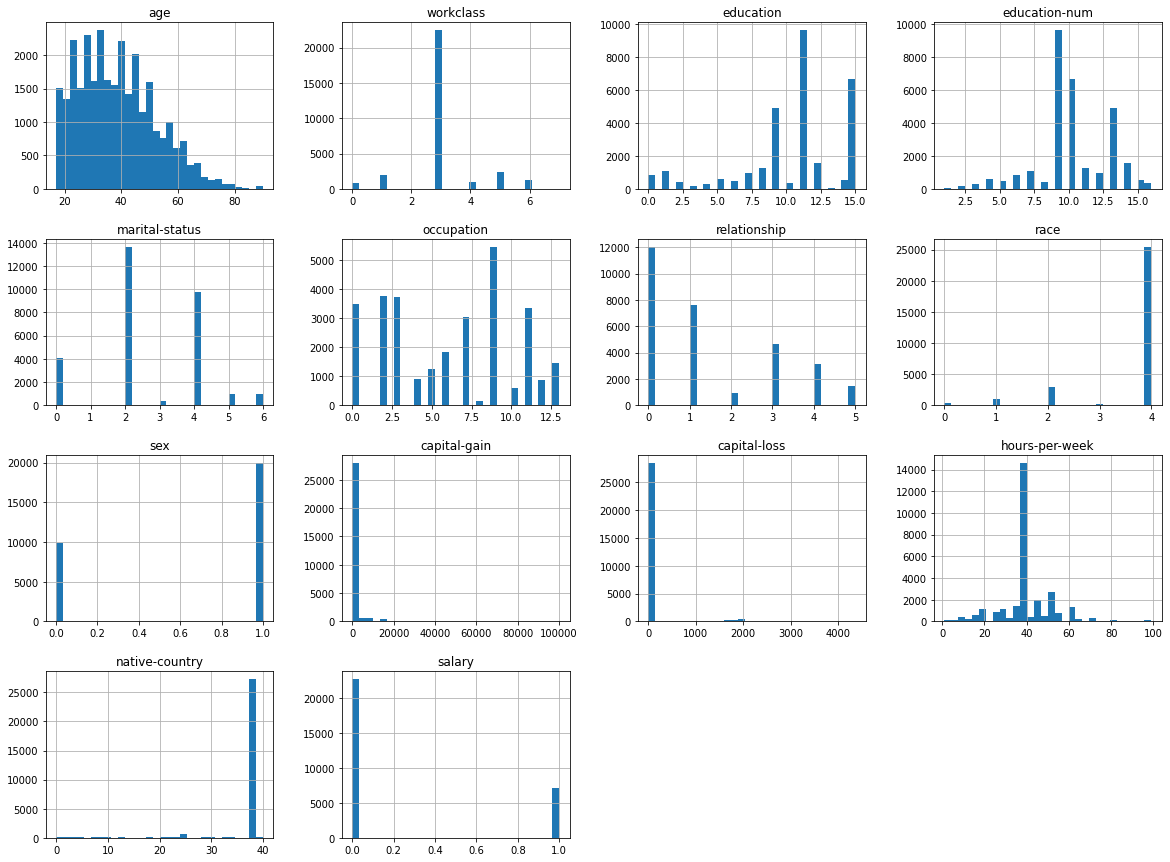

In [632]:
train_df.hist(bins=30, figsize=(20, 15))

We have to normalize our columns to have a better analysis of the data and also to be able to compare the columns when we want to decide which column is more important for prediction. For normalization I used [<i>Standard Score</i>](https://en.wikipedia.org/wiki/Standard_score) method.<br>
I didn't normalize the <i>Salary</i> column because we don't want to compare it to other columns or do analysis with that. I also kept the means and stds of each column for when I want to normalize the test data.

In [633]:
means = {}
stds = {}
for col in train_df.columns[:-1]:
    means[col] = train_df[col].mean()
    stds[col] = train_df[col].std()
    train_df[col] = (train_df[col] - means[col]) / stds[col]
train_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.030660,2.622516,-0.336339,1.135745,0.918457,-1.541412,-0.278207,0.393610,0.703222,0.144193,-0.215547,-0.035288,0.261237,0
1,0.836403,1.719563,-0.336339,1.135745,-0.407149,-0.787211,-0.901237,0.393610,0.703222,-0.146220,-0.215547,-2.228952,0.261237,0
2,-0.042589,-0.086344,0.181019,-0.419659,-1.732754,-0.284409,-0.278207,0.393610,0.703222,-0.146220,-0.215547,-0.035288,0.261237,0
3,1.056151,-0.086344,-2.405769,-1.197362,-0.407149,-0.284409,-0.901237,-1.962521,0.703222,-0.146220,-0.215547,-0.035288,0.261237,0
4,-0.775082,-0.086344,-0.336339,1.135745,-0.407149,0.721193,2.213914,-1.962521,-1.421978,-0.146220,-0.215547,-0.035288,-5.351797,0


In [634]:
cols_categories["salary"]

{'<=50K': 0, '>50K': 1}

I divided people who had high salary and people who had low salary

In [635]:
has_high_salary = train_df["salary"] == 1
high_salary = train_df[has_high_salary] 
low_salary = train_df[~has_high_salary]
low_salary.tail()   

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
29820,0.689904,-1.892251,-0.336339,1.135745,-0.407149,0.721193,-0.901237,0.393610,0.703222,-0.14622,-0.215547,-0.035288,0.261237,0
29821,-0.482085,-0.086344,1.215734,-0.030808,-1.732754,0.721193,-0.278207,0.393610,-1.421978,-0.14622,-0.215547,-0.847756,0.261237,0
29822,0.616655,-1.892251,0.181019,-0.419659,-1.732754,-1.541412,1.590884,0.393610,-1.421978,-0.14622,-0.215547,-0.441522,0.261237,0
29823,-0.042589,-0.086344,0.957055,1.913448,-0.407149,1.223994,2.213914,0.393610,-1.421978,-0.14622,-0.215547,-0.035288,0.261237,0
29824,-1.507575,-0.086344,0.181019,-0.419659,0.918457,-0.284409,0.967854,-1.962521,0.703222,-0.14622,-0.215547,-0.035288,0.261237,0


Now in order to get a better understanding of our features in dataset, first I calculated each feature's mean and std for high salary and low salary parts and then found the Probability Density Function of each of them using ```scipy.stats.norm()``` function(I assumed that each feature will have a normal distribution) and then drew them. Red line represents the distribution of the feature for people with high salary and blue line is for low salary.<br>
I only analyzed numeric features.

In [636]:
def draw_pdfs(ax, col, high_salary_dist, low_salary_dist):
    
    min_x = min(high_salary_dist.ppf(0.01), low_salary_dist.ppf(0.01))
    max_x = max(high_salary_dist.ppf(0.99), low_salary_dist.ppf(0.99))
    x_values = np.linspace(min_x, max_x, 100)
    
    ax.plot(x_values, high_salary_dist.pdf(x_values) , c='r', label='high salary')
    ax.plot(x_values, low_salary_dist.pdf(x_values) , c='b', label= 'low salary')

    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('pdf')
    ax.set_title(f'(Subplot {col})')

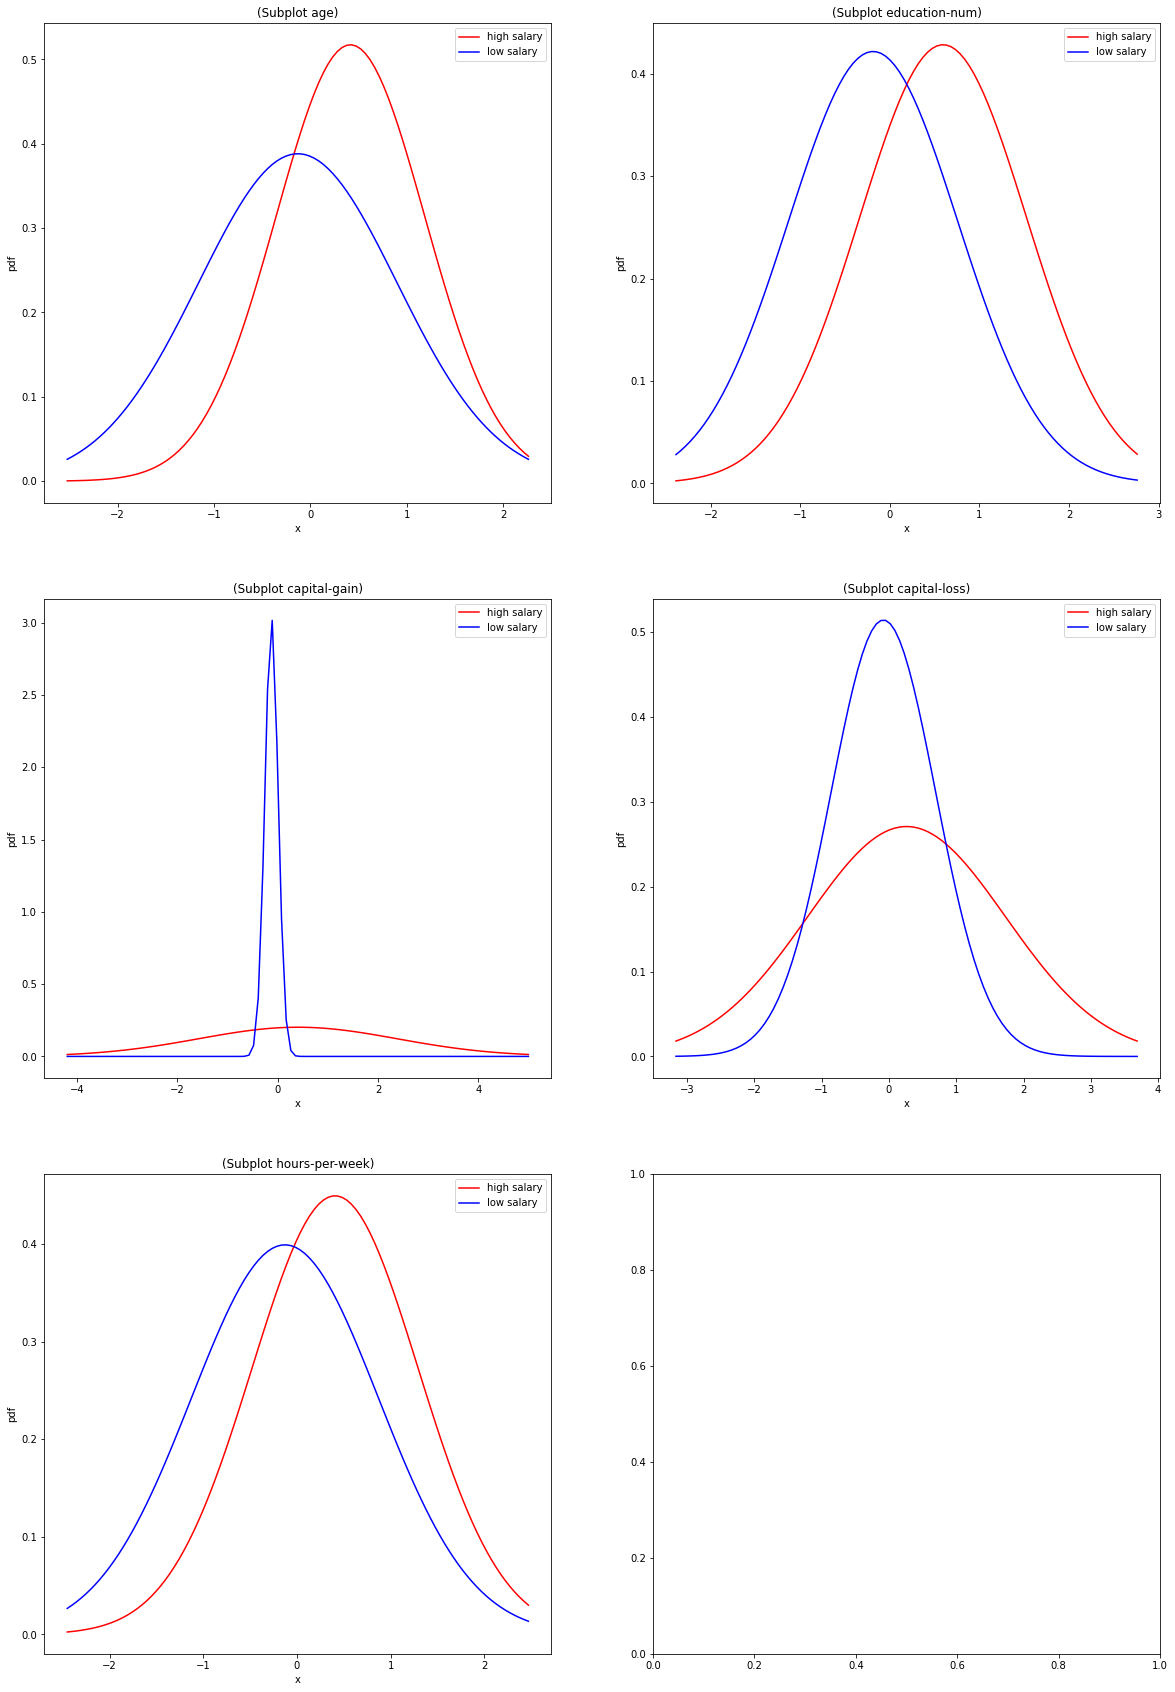

In [637]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

fig, ax_list = plt.subplots(3, 2, figsize=(20, 30))
ax_list = ax_list.flatten()
numerics = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
for col, ax in zip(numerics, ax_list):
    high_salary_dist = norm(high_salary[col].mean(), high_salary[col].std())    
    low_salary_dist = norm(low_salary[col].mean(), low_salary[col].std())    
    draw_pdfs(ax, col, high_salary_dist, low_salary_dist)
plt.show()

We have to choose a feature that salary has more effect on it. This means for each x value there has to be a lot of distance between its high-salary pdf and low-salary pdf. From plots I decided that the capital gain is the better feature for prediction(scales are different in its plot and there's so difference between red and blue graph in it).
<br> I also predicted salaries in train dataset with each of the features to see their performance:
<br> I took two approaches for prediction. first I calculated the pdf of a given value for both high-salary and low salary conditions and chose the maximum as the result:
$$ prediction = max(f(feature|high salary), f(feature|low salary))$$
But then I thought that It's better to use the bayes formula and find the pdf of high salary and low salary with condition of feature and then predict the salary:
$$ f(high salary|feature) = \frac{f(highsalary) \times f(feature|high salary)}{f(feature)} $$
$$ prediction = max(f(high salary|feature), f(low salary|feature))$$

In [638]:
def bayes(a_if_b, b, a):
    b_if_a =  a_if_b * b / a
    return b_if_a

In [639]:
def prediction_func1(col, df):
    high_salary_dist = norm(high_salary[col].mean(), high_salary[col].std())    
    low_salary_dist = norm(low_salary[col].mean(), low_salary[col].std()) 
    prediction = high_salary_dist.pdf(df[col]) > low_salary_dist.pdf(df[col])
    return prediction

def prediction_func2(col, df):
    high_salary_dist = norm(high_salary[col].mean(), high_salary[col].std())    
    low_salary_dist = norm(low_salary[col].mean(), low_salary[col].std()) 
    col_dist = norm(train_df[col].mean(), train_df[col].std()) 
    
    high_salary_pdf = len(high_salary) / len(train_df)
    low_salary_pdf = len(low_salary) / len(train_df)
    col_pdf = col_dist.pdf(df[col])
    
    conditional_high_salary_pdf = bayes(high_salary_dist.pdf(df[col]), high_salary_pdf, col_pdf)
    conditional_low_salary_pdf = bayes(low_salary_dist.pdf(df[col]), low_salary_pdf, col_pdf)
    
    prediction = conditional_high_salary_pdf > conditional_low_salary_pdf
    
    return prediction

In [640]:
def check_accuracy(col, df, prediction_func):
    prediction = prediction_func(col, df)
    accuracy = prediction == df["salary"]
    return accuracy.sum() / len(df)

I checked the accuracy with train dataset and the best one for each of the prediction methods was the <i>capital-gain</i> method. the bayesian method was slightly better than the first method for some features and for some others a lot better!

In [641]:
print("prediction method 1:")
for col in numerics:
    print(check_accuracy(col, train_df, prediction_func1), col)
print()
print("prediction method 2 (bayesian):")
for col in numerics:
    print(check_accuracy(col, train_df, prediction_func2), col)


prediction method 1:
0.614953897736798 age
0.7151047778709136 education-num
0.7894048616932104 capital-gain
0.7606705783738474 capital-loss
0.7018273260687343 hours-per-week

prediction method 2 (bayesian):
0.7601341156747695 age
0.7804191114836546 education-num
0.7929589270746018 capital-gain
0.7610393964794635 capital-loss
0.7601341156747695 hours-per-week


Now we load the test dataset and do the preprocessing parts(label-encoding, NaN handling and normalization):

In [642]:
TEST_DATASET_PATH = "test.csv"
test_df = pd.read_csv("test.csv")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             2736 non-null   int64 
 1   workclass       2571 non-null   object
 2   fnlwgt          2736 non-null   int64 
 3   education       2736 non-null   object
 4   education-num   2736 non-null   int64 
 5   marital-status  2736 non-null   object
 6   occupation      2569 non-null   object
 7   relationship    2736 non-null   object
 8   race            2736 non-null   object
 9   sex             2736 non-null   object
 10  capital-gain    2736 non-null   int64 
 11  capital-loss    2736 non-null   int64 
 12  hours-per-week  2736 non-null   int64 
 13  native-country  2690 non-null   object
 14  salary          2736 non-null   object
dtypes: int64(6), object(9)
memory usage: 320.8+ KB


In [643]:
test_df = test_df.drop(["fnlwgt"], axis = 1)
for col in test_df.select_dtypes(include = object):
    test_df[col] = test_df[col].astype("category").dropna().cat.codes
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2736 non-null   int64  
 1   workclass       2571 non-null   float64
 2   education       2736 non-null   int8   
 3   education-num   2736 non-null   int64  
 4   marital-status  2736 non-null   int8   
 5   occupation      2569 non-null   float64
 6   relationship    2736 non-null   int8   
 7   race            2736 non-null   int8   
 8   sex             2736 non-null   int8   
 9   capital-gain    2736 non-null   int64  
 10  capital-loss    2736 non-null   int64  
 11  hours-per-week  2736 non-null   int64  
 12  native-country  2690 non-null   float64
 13  salary          2736 non-null   int8   
dtypes: float64(3), int64(5), int8(6)
memory usage: 187.2 KB


In [644]:
for col in test_df.columns:
    test_df[col] = test_df[col].fillna(modes[col])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2736 non-null   int64  
 1   workclass       2736 non-null   float64
 2   education       2736 non-null   int8   
 3   education-num   2736 non-null   int64  
 4   marital-status  2736 non-null   int8   
 5   occupation      2736 non-null   float64
 6   relationship    2736 non-null   int8   
 7   race            2736 non-null   int8   
 8   sex             2736 non-null   int8   
 9   capital-gain    2736 non-null   int64  
 10  capital-loss    2736 non-null   int64  
 11  hours-per-week  2736 non-null   int64  
 12  native-country  2736 non-null   float64
 13  salary          2736 non-null   int8   
dtypes: float64(3), int64(5), int8(6)
memory usage: 187.2 KB


In [645]:
for col in test_df.columns[:-1]:
    test_df[col] = (test_df[col] - means[col]) / stds[col]
test_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,-0.994830,-0.086344,0.181019,-0.419659,-0.407149,-1.038611,-0.901237,0.39361,0.703222,-0.14622,-0.215547,-0.035288,-0.068942,0
1,-0.189088,-0.086344,-0.336339,1.135745,-0.407149,0.721193,2.213914,0.39361,-1.421978,-0.14622,-0.215547,-0.685263,-0.068942,1
2,0.103910,-0.086344,-0.595017,0.358043,-1.732754,0.721193,-0.278207,0.39361,-1.421978,-0.14622,-0.215547,-1.660225,-0.068942,0
3,1.275899,1.719563,-2.405769,-1.197362,-0.407149,-1.038611,-0.901237,0.39361,0.703222,-0.14622,-0.215547,-1.660225,-0.068942,0
4,0.836403,-0.086344,-0.595017,0.358043,-1.732754,0.721193,1.590884,0.39361,-1.421978,-0.14622,-0.215547,-0.035288,-0.068942,1


Before saving the prediction results for test dataset I checked each feature's accuracy to make sure my model is better and for both methods capital-gain had the better accuracy.

In [646]:
print("prediction method 1:")
for col in numerics:
    print(check_accuracy(col, test_df, prediction_func1), col)
print()
print("prediction method 2 (bayesian):")
for col in numerics:
    print(check_accuracy(col, test_df, prediction_func2), col)

prediction method 1:
0.6209795321637427 age
0.7112573099415205 education-num
0.7817982456140351 capital-gain
0.7569444444444444 capital-loss
0.7013888888888888 hours-per-week

prediction method 2 (bayesian):
0.7489035087719298 age
0.77046783625731 education-num
0.7850877192982456 capital-gain
0.7569444444444444 capital-loss
0.7489035087719298 hours-per-week


At the end I saved the predicted salaries in prediction.csv file.

In [647]:
prediction = prediction_func2("capital-gain", test_df)
prediction_df = pd.DataFrame(prediction)
prediction_df.head()
prediction_df.to_csv('prediction.csv', index=True)

### Conclusion
capital-gain was the best option for prediction if we want to predict the salary only using one feature, but we could improve our model by using multiple features for prediction. For example we could use a linear relation between some features to predict the salary or we could use non-numeric features for predictions too. We also could fill our NaN data with better method to improve our train dataset. 

### Some sources used for the project:
* [Normalization](https://en.wikipedia.org/wiki/Normalization_(statistics))
* [Why Data Normalization is necessary for Machine Learning models](https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029)
* [Stop Using Mean to Fill Missing Data](https://towardsdatascience.com/stop-using-mean-to-fill-missing-data-678c0d396e22)
* [Predicting if income exceeds $50,000 per year based on 1994 US Census Data with
Simple Classification Techniques](https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf)